In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read Data

In [96]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
"dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
"logged_in","num_compromised","root_shell","su_attempted","num_root",
"num_file_creations","num_shells","num_access_files","num_outbound_cmds",
"is_host_login","is_guest_login","count","srv_count","serror_rate",
"srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
"diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
"dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate","attack_types"]

# train_data = pd.read_table("Dataset/kddcup.data.txt",header=None, sep=',' ,on_bad_lines='skip' ,names = col_names)
train_data = pd.read_table("Dataset/kddcup.data_10_percent.txt",header=None, sep=',' ,on_bad_lines='skip' ,names = col_names)
test_data = pd.read_table("Dataset/corrected",header=None, sep=',' ,on_bad_lines='skip' ,names = col_names)

In [97]:
train_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_types
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494016,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


# DataProcessing

In [98]:
conditions = [(train_data['attack_types'] == 'back.'), 
(train_data['attack_types'] == 'buffer_overflow.'), (train_data['attack_types'] == 'ftp_write.'), 
(train_data['attack_types'] == 'guess_passwd.'), (train_data['attack_types'] == 'imap.'), 
(train_data['attack_types'] == 'ipsweep.'), (train_data['attack_types'] == 'land.'), 
(train_data['attack_types'] == 'loadmodule.'), (train_data['attack_types'] == 'multihop.'), 
(train_data['attack_types'] == 'neptune.'), (train_data['attack_types'] == 'nmap.'), 
(train_data['attack_types'] == 'perl.'), (train_data['attack_types'] == 'phf.'), 
(train_data['attack_types'] == 'pod.'), (train_data['attack_types'] == 'portsweep.'), 
(train_data['attack_types'] == 'rootkit.'), (train_data['attack_types'] == 'satan.'), 
(train_data['attack_types'] == 'smurf.'), (train_data['attack_types'] == 'spy.'), 
(train_data['attack_types'] == 'teardrop.'), (train_data['attack_types'] == 'warezclient.'), 
(train_data['attack_types'] == 'warezmaster.')]

choices = ['dos', 'u2r', 'r2l', 'r2l', 'r2l', 'probe', 'dos', 'u2r', 'r2l', 'dos', 'probe', 'u2r', 'r2l', 'dos', 'probe', 
'u2r', 'probe', 'dos', 'r2l', 'dos', 'r2l', 'r2l'] # dos, u2r, r2l, probe

train_data['label'] = np.select(conditions, choices, default='normal')
# train_data.to_csv("Dataset/kddcup.data_10_percent.csv")

In [99]:
train_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_types,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,tcp,http,SF,310,1881,0,0,0,0,...,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.,normal
494016,0,tcp,http,SF,282,2286,0,0,0,0,...,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.,normal
494017,0,tcp,http,SF,203,1200,0,0,0,0,...,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.,normal
494018,0,tcp,http,SF,291,1200,0,0,0,0,...,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.,normal


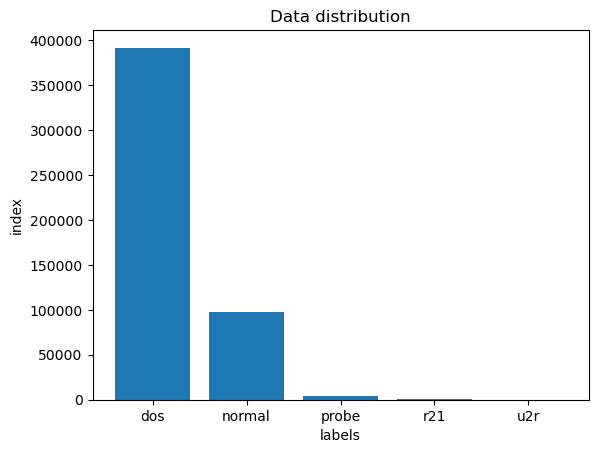

['dos', 'normal', 'probe', 'r21', 'u2r']

In [133]:
train_data_rows = [i for i in train_data.head(len(train_data)).index]
labels = train_data['label']
labels_counts = labels.value_counts()
labels_nums = {"dos":labels_counts[0],"normal":labels_counts[1],"probe":labels_counts[2],"r21":labels_counts[3],"u2r":labels_counts[4]}
labels_keys = [i for i in labels_nums.keys()]
labels_values = [i for i in labels_nums.values()]
x = np.arange(len(labels_keys))

plt.bar(x, labels_values)
plt.xticks(x, labels_keys)
plt.xlabel('labels')
plt.ylabel('index')
plt.title('Data distribution')
plt.show()

In [101]:
conditions = [(test_data['attack_types'] == 'back.'), 
(test_data['attack_types'] == 'buffer_overflow.'), (test_data['attack_types'] == 'ftp_write.'), 
(test_data['attack_types'] == 'guess_passwd.'), (test_data['attack_types'] == 'imap.'), 
(test_data['attack_types'] == 'ipsweep.'), (test_data['attack_types'] == 'land.'), 
(test_data['attack_types'] == 'loadmodule.'), (test_data['attack_types'] == 'multihop.'), 
(test_data['attack_types'] == 'neptune.'), (test_data['attack_types'] == 'nmap.'), 
(test_data['attack_types'] == 'perl.'), (test_data['attack_types'] == 'phf.'), 
(test_data['attack_types'] == 'pod.'), (test_data['attack_types'] == 'portsweep.'), 
(test_data['attack_types'] == 'rootkit.'), (test_data['attack_types'] == 'satan.'), 
(test_data['attack_types'] == 'smurf.'), (test_data['attack_types'] == 'spy.'), 
(test_data['attack_types'] == 'teardrop.'), (test_data['attack_types'] == 'warezclient.'), 
(test_data['attack_types'] == 'warezmaster.')]

choices = ['dos', 'u2r', 'r2l', 'r2l', 'r2l', 'probe', 'dos', 'u2r', 'r2l', 'dos', 'probe', 'u2r', 'r2l', 'dos', 'probe', 
'u2r', 'probe', 'dos', 'r2l', 'dos', 'r2l', 'r2l'] # dos, u2r, r2l, probe

test_data['label'] = np.select(conditions, choices, default='normal')
# test_data.to_csv("Dataset/corrected.csv")

In [102]:
num_features = ["duration", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", 
                "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations", "num_shells",
                "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate", 
                "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate",
                "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate", 
                "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
                "dst_host_rerror_rate", "dst_host_srv_rerror_rate"]
train_x = train_data[num_features].astype(float)
test_x = test_data[num_features].astype(float)
train_x

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,181.0,5450.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,9.0,9.0,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0
1,0.0,239.0,486.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,19.0,19.0,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0
2,0.0,235.0,1337.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,29.0,29.0,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0
3,0.0,219.0,1337.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,39.0,39.0,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0
4,0.0,217.0,2032.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,49.0,49.0,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0.0,310.0,1881.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,86.0,255.0,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0
494016,0.0,282.0,2286.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,6.0,255.0,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0
494017,0.0,203.0,1200.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,16.0,255.0,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0
494018,0.0,291.0,1200.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,26.0,255.0,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0


In [103]:
train_y = train_data['label']
test_y = test_data['label']

In [104]:
#Ignoring the deprecation warnings
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning) 

#Rescaling the data
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

min_max_scaler = min_max_scaler.fit(train_x)
train_x = min_max_scaler.transform(train_x)

min_max_scaler = min_max_scaler.fit(test_x)
test_x = min_max_scaler.transform(test_x)

train_x

array([[0.00000000e+00, 2.61041764e-07, 1.05713002e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.44690506e-07, 9.42688423e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.38921627e-07, 2.59336301e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 2.92770597e-07, 2.32762574e-04, ...,
        1.00000000e-02, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 4.19685930e-07, 2.32762574e-04, ...,
        1.00000000e-02, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.15846112e-07, 2.39357513e-04, ...,
        1.00000000e-02, 0.00000000e+00, 0.00000000e+00]])

# <span style="color:red">Training: RandomForest</span>

In [105]:
#Training a classifier
from sklearn.ensemble import RandomForestClassifier
import time
clf = RandomForestClassifier(n_estimators=100 ,random_state = 0)
t0 = time.time()
clf.fit(train_x, train_y)
tt = time.time() - t0
pred = clf.predict(test_x)
print ("Classifier trained in {} seconds.".format(round(tt, 3)))

Classifier trained in 32.392 seconds.


# K-FOLD

In [106]:
from sklearn.model_selection import KFold

kf =KFold(n_splits=3, shuffle=True, random_state=42)
cnt = 1

for train_index, test_index in kf.split(train_x, train_y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 329346, Test set:164674
Fold:2, Train set: 329347, Test set:164673
Fold:3, Train set: 329347, Test set:164673


# Accuracy_score

In [107]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
acc = accuracy_score(pred, test_y)
cv_score = cross_val_score(clf, train_x, train_y, cv=kf)
print("Scores for each fold: ",cv_score)
print ("Accuracy is {}.".format(round(acc,4)))

Scores for each fold:  [0.99961135 0.99969637 0.99965993]
Accuracy is 0.9762.


# Confusion_matrix

In [108]:
from sklearn.metrics import confusion_matrix
label = ["dos", "normal", "probe", "r2l", "u2r"]
Confusion_Matrix = pd.DataFrame(confusion_matrix(test_y, pred,labels=label))
Confusion_Matrix.columns = label
Confusion_Matrix.index = label
print(Confusion_Matrix)

           dos  normal  probe  r2l  u2r
dos     223267      15     14    2    0
normal     596   77748    970    3    5
probe        4      12   2361    0    0
r2l         55    5598     87  251    2
u2r          0      37      0    0    2


# Precision_score

In [109]:
from sklearn.metrics import precision_score
print(precision_score(test_y, pred, average='macro'))
print(precision_score(test_y, pred, average='micro'))
print(precision_score(test_y, pred, average='weighted'))
print(precision_score(test_y, pred, average=None))

0.7639642720941848
0.9762080063273842
0.9777293028453065
[0.99707487 0.93211845 0.68793706 0.98046875 0.22222222]


# Recall_score

In [110]:
from sklearn.metrics import recall_score
print(recall_score(test_y, pred, average='macro'))
print(recall_score(test_y, pred, average='micro'))
print(recall_score(test_y, pred, average='weighted'))
print(recall_score(test_y, pred, average=None))

0.6132902149243435
0.9762080063273842
0.9762080063273842
[0.99986117 0.98015683 0.99326883 0.0418822  0.05128205]


# F1_score

In [111]:
from sklearn.metrics import f1_score
print(f1_score(test_y, pred, average='macro'))
print(f1_score(test_y, pred, average='micro'))
print(f1_score(test_y, pred, average='weighted'))
print(f1_score(test_y, pred, average=None))
rf_f1_score = f1_score(test_y, pred, average='micro')

0.5861086178798002
0.9762080063273842
0.9682931783509195
[0.99846608 0.95553425 0.81287657 0.08033285 0.08333333]


# <span style="color:blue">Training: SVM</span>

In [112]:
from sklearn import svm
clf=svm.SVC(kernel='rbf',C=1,gamma='auto')
t0 = time.time()
clf.fit(train_x, train_y)
tt = time.time() - t0
pred = clf.predict(test_x)
print ("Classifier trained in {} seconds.".format(round(tt, 3)))

Classifier trained in 559.945 seconds.


# Accuracy_score

In [113]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
acc = accuracy_score(pred, test_y)
cv_score = cross_val_score(clf, train_x, train_y, cv=kf)
print("Scores for each fold: ",cv_score)
print ("Accuracy is {}.".format(round(acc,4)))

Scores for each fold:  [0.99291934 0.9930529  0.99275534]
Accuracy is 0.8751.


# Confusion_matrix

In [114]:
from sklearn.metrics import confusion_matrix
label = ["dos", "normal", "probe", "r2l", "u2r"]
Confusion_Matrix = pd.DataFrame(confusion_matrix(test_y, pred,labels=label))
Confusion_Matrix.columns = label
Confusion_Matrix.index = label
print(Confusion_Matrix)

           dos  normal  probe  r2l  u2r
dos     193410   29864     24    0    0
normal    1418   76838   1016   50    0
probe       15     428   1934    0    0
r2l          8    5951     26    8    0
u2r          0      38      0    1    0


# Precision_score

In [115]:
from sklearn.metrics import precision_score
print(precision_score(test_y, pred, average='macro'))
print(precision_score(test_y, pred, average='micro'))
print(precision_score(test_y, pred, average='weighted'))
print(precision_score(test_y, pred, average=None))

D:\Users\gcobs\anaconda3\envs\MLFN\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.49042629184436093
0.8751273996958483


D:\Users\gcobs\anaconda3\envs\MLFN\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8933971442505151
[0.99260461 0.67926697 0.64466667 0.13559322 0.        ]


D:\Users\gcobs\anaconda3\envs\MLFN\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Recall_score

In [116]:
from sklearn.metrics import recall_score
print(recall_score(test_y, pred, average='macro'))
print(recall_score(test_y, pred, average='micro'))
print(recall_score(test_y, pred, average='weighted'))
print(recall_score(test_y, pred, average=None))

0.5299604155835757
0.8751273996958483
0.8751273996958483
[0.86615196 0.9686846  0.81363063 0.00133489 0.        ]


# F1_score

In [117]:
from sklearn.metrics import f1_score
print(f1_score(test_y, pred, average='macro'))
print(f1_score(test_y, pred, average='micro'))
print(f1_score(test_y, pred, average='weighted'))
print(f1_score(test_y, pred, average=None))
svm_f1_score = f1_score(test_y, pred, average='micro')

0.4891285151022008
0.8751273996958483
0.873349756535064
[0.92507695 0.79856164 0.71936024 0.00264375 0.        ]


# <span style="color:green">Training: DecisionTree</span>

In [118]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
t0 = time.time()
clf.fit(train_x, train_y)
tt = time.time() - t0
pred = clf.predict(test_x)
print ("Classifier trained in {} seconds.".format(round(tt, 3)))

Classifier trained in 3.15 seconds.


# Accuracy_score

In [119]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
acc = accuracy_score(pred, test_y)
cv_score = cross_val_score(clf, train_x, train_y, cv=kf)
print("Scores for each fold: ",cv_score)
print ("Accuracy is {}.".format(round(acc,4)))

Scores for each fold:  [0.99938667 0.99952633 0.99942917]
Accuracy is 0.9701.


# Confusion_matrix

In [120]:
from sklearn.metrics import confusion_matrix
label = ["dos", "normal", "probe", "r2l", "u2r"]
Confusion_Matrix = pd.DataFrame(confusion_matrix(test_y, pred,labels=label))
Confusion_Matrix.columns = label
Confusion_Matrix.index = label
print(Confusion_Matrix)

           dos  normal  probe  r2l  u2r
dos     223227      59      9    3    0
normal    1073   76212   1305  719   13
probe       16      18   2094  249    0
r2l          1    4980    126  207  679
u2r         17      19      0    2    1


# Precision_score 

In [121]:
from sklearn.metrics import precision_score
print(precision_score(test_y, pred, average='macro'))
print(precision_score(test_y, pred, average='micro'))
print(precision_score(test_y, pred, average='weighted'))
print(precision_score(test_y, pred, average=None))

0.540403438784252
0.9701378328065872
0.9614045385632499
[0.99506539 0.93755536 0.59252971 0.17542373 0.001443  ]


# Recall_score

In [122]:
from sklearn.metrics import recall_score
print(recall_score(test_y, pred, average='macro'))
print(recall_score(test_y, pred, average='micro'))
print(recall_score(test_y, pred, average='weighted'))
print(recall_score(test_y, pred, average=None))

0.5803196889028946
0.9701378328065872
0.9701378328065872
[0.99968204 0.96079272 0.88094236 0.0345403  0.02564103]


# F1_score

In [123]:
from sklearn.metrics import f1_score
print(f1_score(test_y, pred, average='macro'))
print(f1_score(test_y, pred, average='micro'))
print(f1_score(test_y, pred, average='weighted'))
print(f1_score(test_y, pred, average=None))
dt_f1_score = f1_score(test_y, pred, average='micro')

0.5430716851494297
0.9701378328065872
0.9646032790817348
[0.99736837 0.94903182 0.70850956 0.05771644 0.00273224]


# F1-scores of 3 different algorithms comparison.

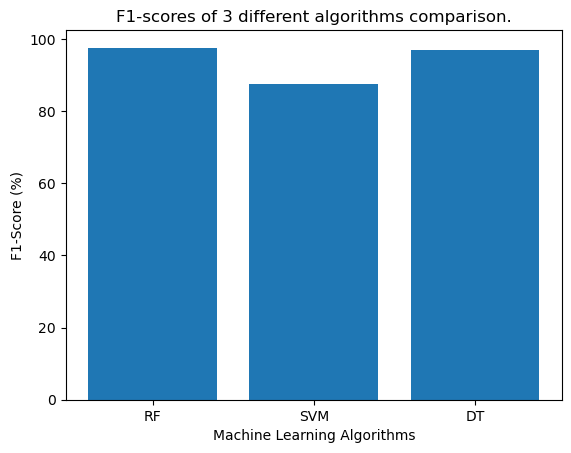

[97.62080063273842, 87.51273996958483, 97.01378328065871]

In [139]:
x = ['RF', 'SVM', 'DT']
x_len = np.arange(len(x))
y = [rf_f1_score*100, svm_f1_score*100, dt_f1_score*100 ]
plt.bar(x_len, y)
plt.xticks(x_len, x)
plt.xlabel('Machine Learning Algorithms')
plt.ylabel('F1-Score (%)')
plt.title('F1-scores of 3 different algorithms comparison.')
plt.show()
y